## Tentukan library yang akan digunakan

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

## Load data set

In [2]:
# Membaca dataset dari file CSV
df = pd.read_csv("heart.csv")


# Menampilkan beberapa baris pertama dari dataset
#print(df.head())

## Memahami Data

In [3]:
df.head(n = 10) # menampilkan 10 data teratas

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
df.tail(n = 10) # menampilkan 10 data terakhir

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Mengecek type data dari data

In [6]:
df.info(show_counts=True, memory_usage=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## melihat data yang bertipe object dengan mengabaikan int dan float

In [7]:
df.describe(exclude=[int,float])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


## Melihat nama nama Kolom

In [8]:
list(df.columns)

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

## Memeriksa nilai yang hilang di panda dengan.isnull()

In [9]:
df2 = df.copy() # membuat duplikat data untuk di modifikasi
df2.head(-1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1


In [10]:
df2.isnull().sum() # mengecek dan menghitung data yang kosong

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Mengecek data duplikat

In [11]:
# Mengecek data duplikat
duplicate_rows = df2[df2.duplicated()]
# Menghitung jumlah data duplikat
num_duplicates = len(duplicate_rows)

print("Jumlah data duplikat:", num_duplicates)


Jumlah data duplikat: 0


## Merubah data objek menjadi integer agar bisa di lakukan perhitungan

In [12]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()


# Transformasi
df2['Sex'] = encode.fit_transform(df2['Sex'].values)
df2['ChestPainType'] = encode.fit_transform(df2['ChestPainType'].values)
df2['RestingECG'] = encode.fit_transform(df2['RestingECG'].values)
df2['ExerciseAngina'] = encode.fit_transform(df2['ExerciseAngina'].values)
df2['ST_Slope'] = encode.fit_transform(df2['ST_Slope'].values)


In [13]:
# Menggunakan metode map untuk mengganti nilai dalam kolom 'Sex'
#df2['Sex'] = df2['Sex'].map({'F': 0,'M':1})

# Menggunakan metode map untuk mengganti nilai dalam kolom 'ChestPainType'
#df2['ChestPainType'] = df2['ChestPainType'].map({'TA': 0,'ATA':1,'NAP':2,'ASY':3})

# Menggunakan metode map untuk mengganti nilai dalam kolom 'RestingECG'
#df2['RestingECG'] = df2['RestingECG'].map({'Normal': 0,'ST':1,'LVH':2})

# Menggunakan metode map untuk mengganti nilai dalam kolom 'ExerciseAngina'
#df2['ExerciseAngina'] = df2['ExerciseAngina'].map({'N': 0,'Y':1})

# Menggunakan metode map untuk mengganti nilai dalam kolom 'ExerciseAngina'
#df2['ST_Slope'] = df2['ST_Slope'].map({'Up': 0,'Flat':1,'Down':2})

In [14]:
#df2.head()

## Mengecek Hasil perubahan data

In [15]:
df2.head(-1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,0,0,140,241,0,1,123,1,0.2,1,1
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1


In [16]:
df2.isnull().sum() # mengecek kembali apakah ada data Null

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Memisahkan data atribut dan label

In [17]:
X = df2.drop(columns= 'HeartDisease',axis=1)
Y = df2['HeartDisease']

In [18]:
print(X)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

In [19]:
print(Y)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64


## Pisahkan data training dan data testing

In [20]:
# membuat data size 0,2 artinya data testing 20% dan data training 80%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [21]:
# menampilkan data size
print("Jumlah data X = ", X.shape, "|Jumlah data X_train = ", X_train.shape, "|Jumlah data X_test = ", X_test.shape)

Jumlah data X =  (918, 11) |Jumlah data X_train =  (734, 11) |Jumlah data X_test =  (184, 11)


## Melakukan Normalisasi data

In [22]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Membuat Model Training

In [23]:
# setelah melakukan uji coba K dari 3-30 didapat 19 menghasilkan akurasi terbaik
knn = KNeighborsClassifier(n_neighbors = 19, metric= 'euclidean')
knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=19)

## Evaluasi Model

In [24]:
X_train_prediction = knn.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Akurasi Data Training :', training_data_accuracy)

Akurasi Data Training : 0.8664850136239782


In [25]:
X_test_prediction = knn.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Akurasi Data Testing :', test_data_accuracy)

Akurasi Data Testing : 0.875


### Confusion Matrix

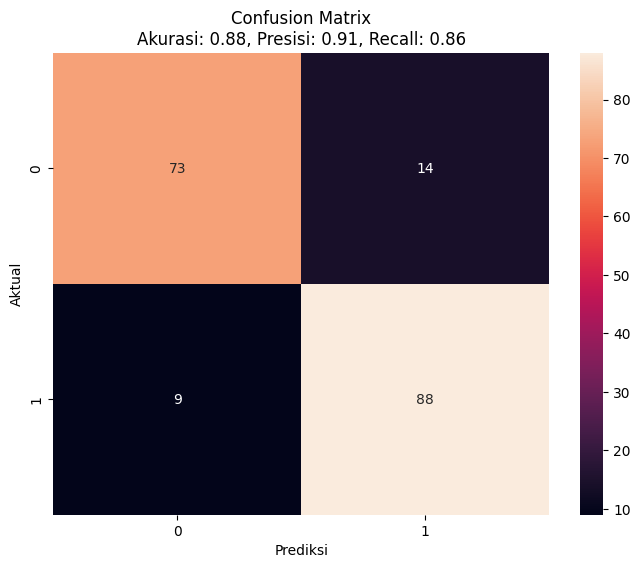

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung confusion matrix
cm = confusion_matrix(X_test_prediction, Y_test)

# Hitung metrik akurasi, presisi, dan recall
accuracy = accuracy_score(Y_test, X_test_prediction)
precision = precision_score(Y_test, X_test_prediction)
recall = recall_score(Y_test, X_test_prediction)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title(f'Confusion Matrix\nAkurasi: {accuracy:.2f}, Presisi: {precision:.2f}, Recall: {recall:.2f}')
plt.show()


## Buatkan Model Prediksi / klasifikasi

In [28]:
# Mencoba Mem-prediksi data inputan
input_data = (48, 0, 3, 138, 214, 0, 0, 108, 1, 1.5, 1)
#input_data = (40, 1, 1, 140, 289, 0, 1, 172, 0, 0, 2) # Jawabannya 0
#input_data = (59, 1, 2, 130, 318, 0, 0, 120, 1, 1, 1) #salah

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = knn.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print('Pasien Tidak Terkena Penyakit Jantung')
else:
  print('Pasien Terkena Penyakit Jantung')

[1]
Pasien Terkena Penyakit Jantung


## Simpan Model

In [ ]:
import pickle

In [ ]:
filename = 'gagal_jantung.sav'
pickle.dump(knn, open(filename, 'wb'))